In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics
import math
import random
import sys

### Business Problem
<p> Determine the go to Market for the XYZ company to invest in Cab companies: Pink Cab or Yellow Cab</p>

In [2]:
City_Data=pd.read_csv('DataSets/Cab_Data.csv')
City=pd.read_csv('DataSets/City.csv')
Customer_ID=pd.read_csv('DataSets/Customer_ID.csv')
Transaction_ID=pd.read_csv('DataSets/Transaction_ID.csv')

In [3]:
City_Data

Transaction ID Date of Travel     Company           City  \
0             10000011         1/8/16    Pink Cab     ATLANTA GA   
1             10000012         1/9/16    Pink Cab     ATLANTA GA   
2             10000013        1/10/16    Pink Cab     ATLANTA GA   
3             10000014        1/11/16    Pink Cab     ATLANTA GA   
4             10000015        1/12/16    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101       12/27/99  Yellow Cab  WASHINGTON DC   
359388        10440104       12/28/99  Yellow Cab  WASHINGTON DC   
359389        10440105       12/29/99  Yellow Cab  WASHINGTON DC   
359390        10440106       12/30/99  Yellow Cab  WASHINGTON DC   
359391        10440107       12/31/99  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2               9.04         125.20       97.6320  
3              33.17         377.40      351.6020  
4               8.73         114.62       97.7760  
...              ...            ...           ...  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192  

[359392 rows x 7 columns]

In [4]:
City_Data['Date of Travel']=pd.to_datetime(City_Data['Date of Travel'])

In [5]:
City_Data

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-09    Pink Cab     ATLANTA GA   
2             10000013     2016-01-10    Pink Cab     ATLANTA GA   
3             10000014     2016-01-11    Pink Cab     ATLANTA GA   
4             10000015     2016-01-12    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     1999-12-27  Yellow Cab  WASHINGTON DC   
359388        10440104     1999-12-28  Yellow Cab  WASHINGTON DC   
359389        10440105     1999-12-29  Yellow Cab  WASHINGTON DC   
359390        10440106     1999-12-30  Yellow Cab  WASHINGTON DC   
359391        10440107     1999-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2               9.04         125.20       97.6320  
3              33.17         377.40      351.6020  
4               8.73         114.62       97.7760  
...              ...            ...           ...  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192  

[359392 rows x 7 columns]

In [6]:
City_Data.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000

In [7]:
City

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [8]:
Customer_ID

Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]

In [9]:
Transaction_ID

Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]

### Properties of data provided
<ul>
   <li>Categorical Variables: Company(Yellow, Pink), Gender, Payment_Mode, City</li>
   <li>Continuous/Uniform Variables: Transaction_ID,Date of Travel, KM Travelled, Price Charged, Cost of trip, Customer ID, Population, Users</li>
</ul>

In [10]:
df=City_Data.join(Transaction_ID.set_index('Transaction ID'), on='Transaction ID')
df

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-09    Pink Cab     ATLANTA GA   
2             10000013     2016-01-10    Pink Cab     ATLANTA GA   
3             10000014     2016-01-11    Pink Cab     ATLANTA GA   
4             10000015     2016-01-12    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     1999-12-27  Yellow Cab  WASHINGTON DC   
359388        10440104     1999-12-28  Yellow Cab  WASHINGTON DC   
359389        10440105     1999-12-29  Yellow Cab  WASHINGTON DC   
359390        10440106     1999-12-30  Yellow Cab  WASHINGTON DC   
359391        10440107     1999-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  
0              30.45         370.95      313.6350        29290         Card  
1              28.62         358.52      334.8540        27703         Card  
2               9.04         125.20       97.6320        28712         Cash  
3              33.17         377.40      351.6020        28020         Cash  
4               8.73         114.62       97.7760        27182         Card  
...              ...            ...           ...          ...          ...  
359387          4.80          69.24       63.3600        52392         Cash  
359388          8.40         113.75      106.8480        53286         Cash  
359389         27.75         437.07      349.6500        52265         Cash  
359390          8.80         146.19      114.0480        52175         Card  
359391         12.76         191.58      177.6192        52917         Card  

[359392 rows x 9 columns]

In [11]:
df=df.join(Customer_ID.set_index('Customer ID'), on='Customer ID')
df

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-09    Pink Cab     ATLANTA GA   
2             10000013     2016-01-10    Pink Cab     ATLANTA GA   
3             10000014     2016-01-11    Pink Cab     ATLANTA GA   
4             10000015     2016-01-12    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     1999-12-27  Yellow Cab  WASHINGTON DC   
359388        10440104     1999-12-28  Yellow Cab  WASHINGTON DC   
359389        10440105     1999-12-29  Yellow Cab  WASHINGTON DC   
359390        10440106     1999-12-30  Yellow Cab  WASHINGTON DC   
359391        10440107     1999-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              28.62         358.52      334.8540        27703         Card   
2               9.04         125.20       97.6320        28712         Cash   
3              33.17         377.40      351.6020        28020         Cash   
4               8.73         114.62       97.7760        27182         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24       63.3600        52392         Cash   
359388          8.40         113.75      106.8480        53286         Cash   
359389         27.75         437.07      349.6500        52265         Cash   
359390          8.80         146.19      114.0480        52175         Card   
359391         12.76         191.58      177.6192        52917         Card   

       Gender  Age  Income (USD/Month)  
0        Male   28               10813  
1        Male   27                9237  
2        Male   53               11242  
3        Male   23               23327  
4        Male   33                8536  
...       ...  ...                 ...  
359387   Male   24               15651  
359388   Male   32                6528  
359389   Male   56                7966  
359390   Male   32                6423  
359391   Male   20               11284  

[359392 rows x 12 columns]

### Pairplots between all  the features

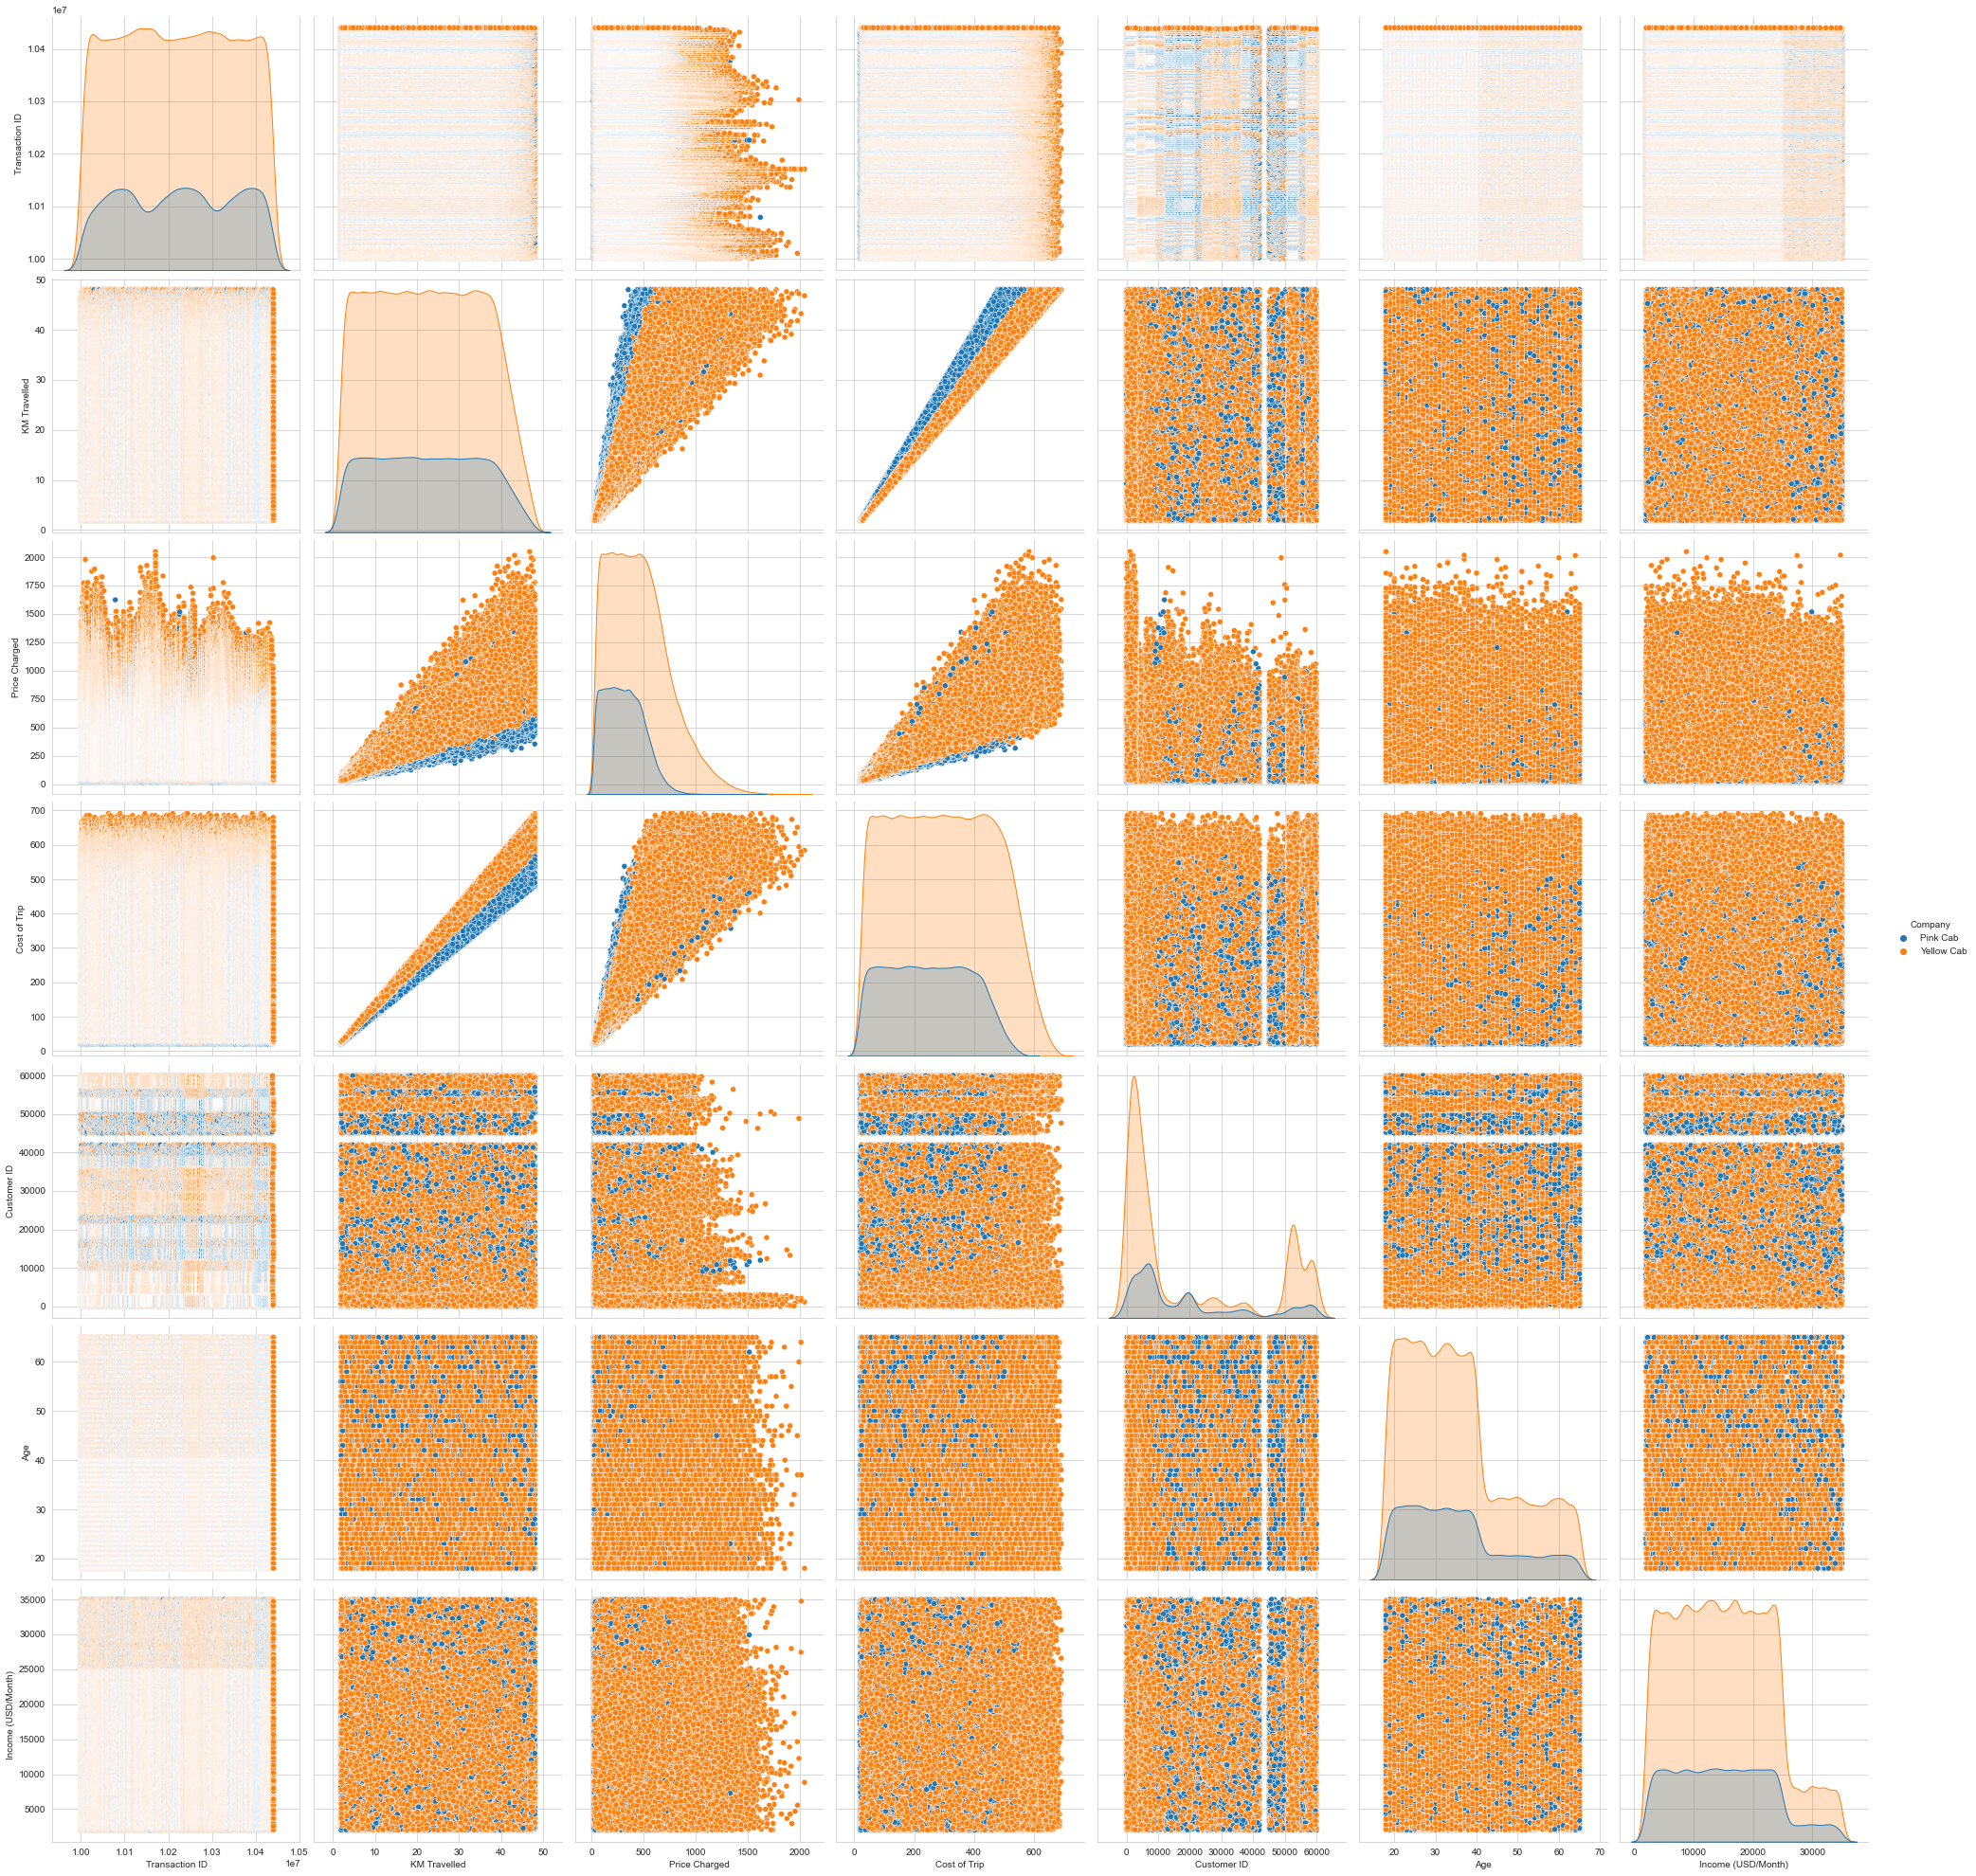

In [12]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Company", height=4)
plt.show()

<p>I have plotted the pair plots between all the features in order to determine if any of the features are correlated, we can see that the KM Travelled and Cost of Trip are directly correlated, also KM travelled and Price charged are directly correlated which only make sense.</p>
<p>We can see at the probability density function of all the pairs of features, the density of yellow cabs is much higher than the pink cabs. Therefore we can explore this further.</p>

In [13]:
#Findling all the data of pink cab
df_pinkcab=df.loc[df['Company']=='Pink Cab']


In [14]:
#finding all the data of Yellow Cab
df_yellowcab=df.loc[df['Company']=='Yellow Cab']
df_yellowcab

Transaction ID Date of Travel     Company           City  \
233           10000384     2016-08-28  Yellow Cab     ATLANTA GA   
234           10000385     2016-08-29  Yellow Cab     ATLANTA GA   
235           10000386     2016-08-30  Yellow Cab     ATLANTA GA   
236           10000387     2016-08-31  Yellow Cab     ATLANTA GA   
237           10000388     2016-09-01  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     1999-12-27  Yellow Cab  WASHINGTON DC   
359388        10440104     1999-12-28  Yellow Cab  WASHINGTON DC   
359389        10440105     1999-12-29  Yellow Cab  WASHINGTON DC   
359390        10440106     1999-12-30  Yellow Cab  WASHINGTON DC   
359391        10440107     1999-12-31  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
233            33.93        1341.17      464.1624        27602         Card   
234            42.18        1412.06      516.2832        27594         Cash   
235            10.60         364.62      132.2880        27884         Cash   
236            26.75         838.00      333.8400        28533         Cash   
237            46.02        1540.61      596.4192        29039         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24       63.3600        52392         Cash   
359388          8.40         113.75      106.8480        53286         Cash   
359389         27.75         437.07      349.6500        52265         Cash   
359390          8.80         146.19      114.0480        52175         Card   
359391         12.76         191.58      177.6192        52917         Card   

       Gender  Age  Income (USD/Month)  
233      Male   23                8542  
234      Male   28                3901  
235      Male   32               13505  
236      Male   39               28386  
237      Male   35               17761  
...       ...  ...                 ...  
359387   Male   24               15651  
359388   Male   32                6528  
359389   Male   56                7966  
359390   Male   32                6423  
359391   Male   20               11284  

[274681 rows x 12 columns]

In [15]:
#Pink Cab Based on Cities

# g=df_pinkcab.groupby('City')
# for city,city_df in g:
#     print(city)
#     print(city_df)

### Analysis of Kilo Meters Travelled 

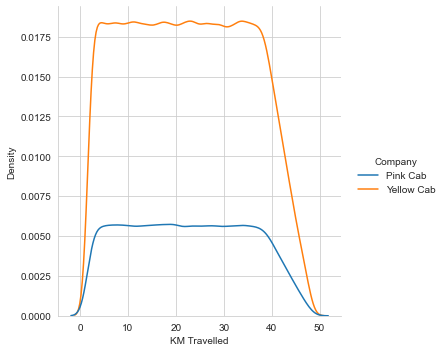

In [16]:
sns.displot(df, x="KM Travelled", hue="Company",kind="kde")

### Analysis of Price Charged

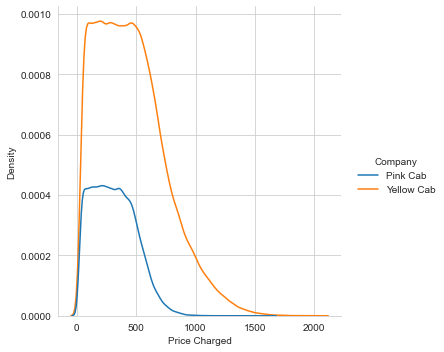

In [17]:
sns.displot(df, x="Price Charged", hue="Company",kind="kde")

### Analysis of Cost of Trip

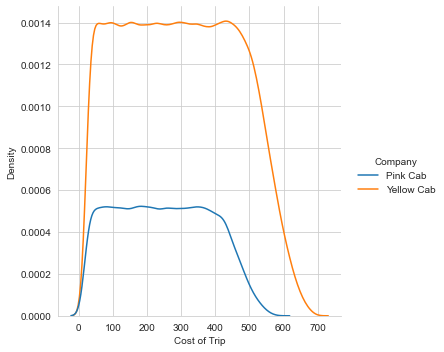

In [18]:
sns.displot(df, x="Cost of Trip", hue="Company",kind="kde")

### Analysis of Gender

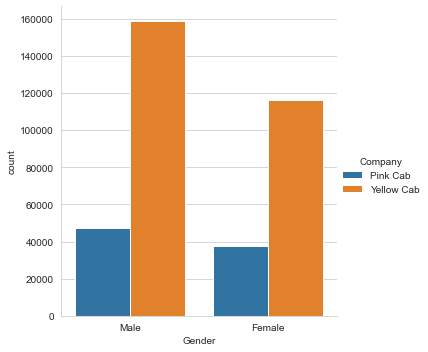

In [19]:
sns.catplot(data=df,x='Gender',hue='Company',kind='count')

### Analysis of Payment Mode

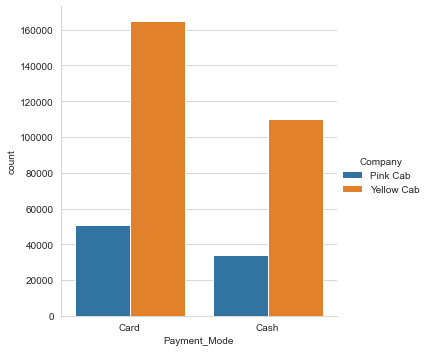

In [20]:
sns.catplot(data=df,x='Payment_Mode',hue='Company',kind='count')

### Analysis based on Income

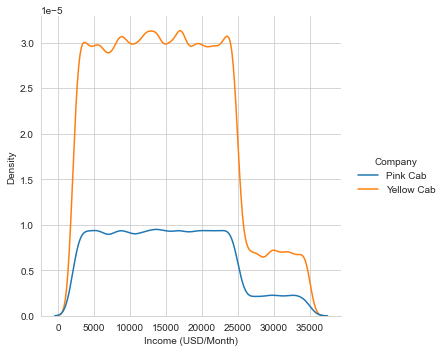

In [21]:
sns.displot(df, x="Income (USD/Month)", hue="Company",kind="kde")

### Analysis based on age

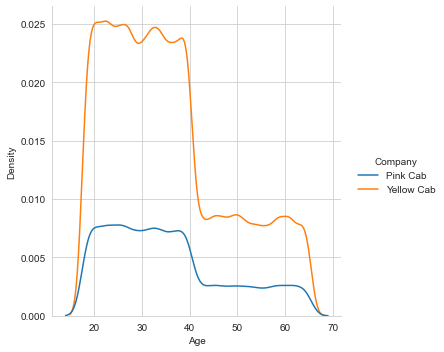

In [22]:
sns.displot(df, x="Age", hue="Company",kind="kde")

### Analysis of cabs based on Date

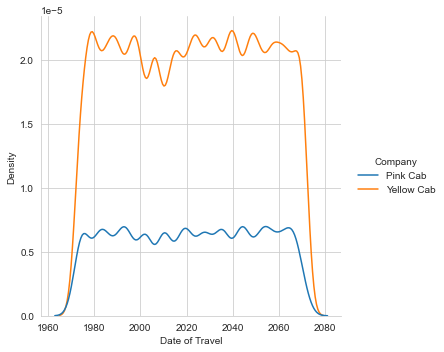

In [23]:
sns.displot(df, x="Date of Travel", hue="Company",kind="kde")

Based on the above plot we can see that there is some drop in Yellow cabs from 2020 to 2018 however, it was still higher than pink cab.

In [24]:
# sns.catplot(data=City_Data,x='City',kind='count',height=20, aspect=15/8)

Text(0.5, 0.98, 'City Wise Users')

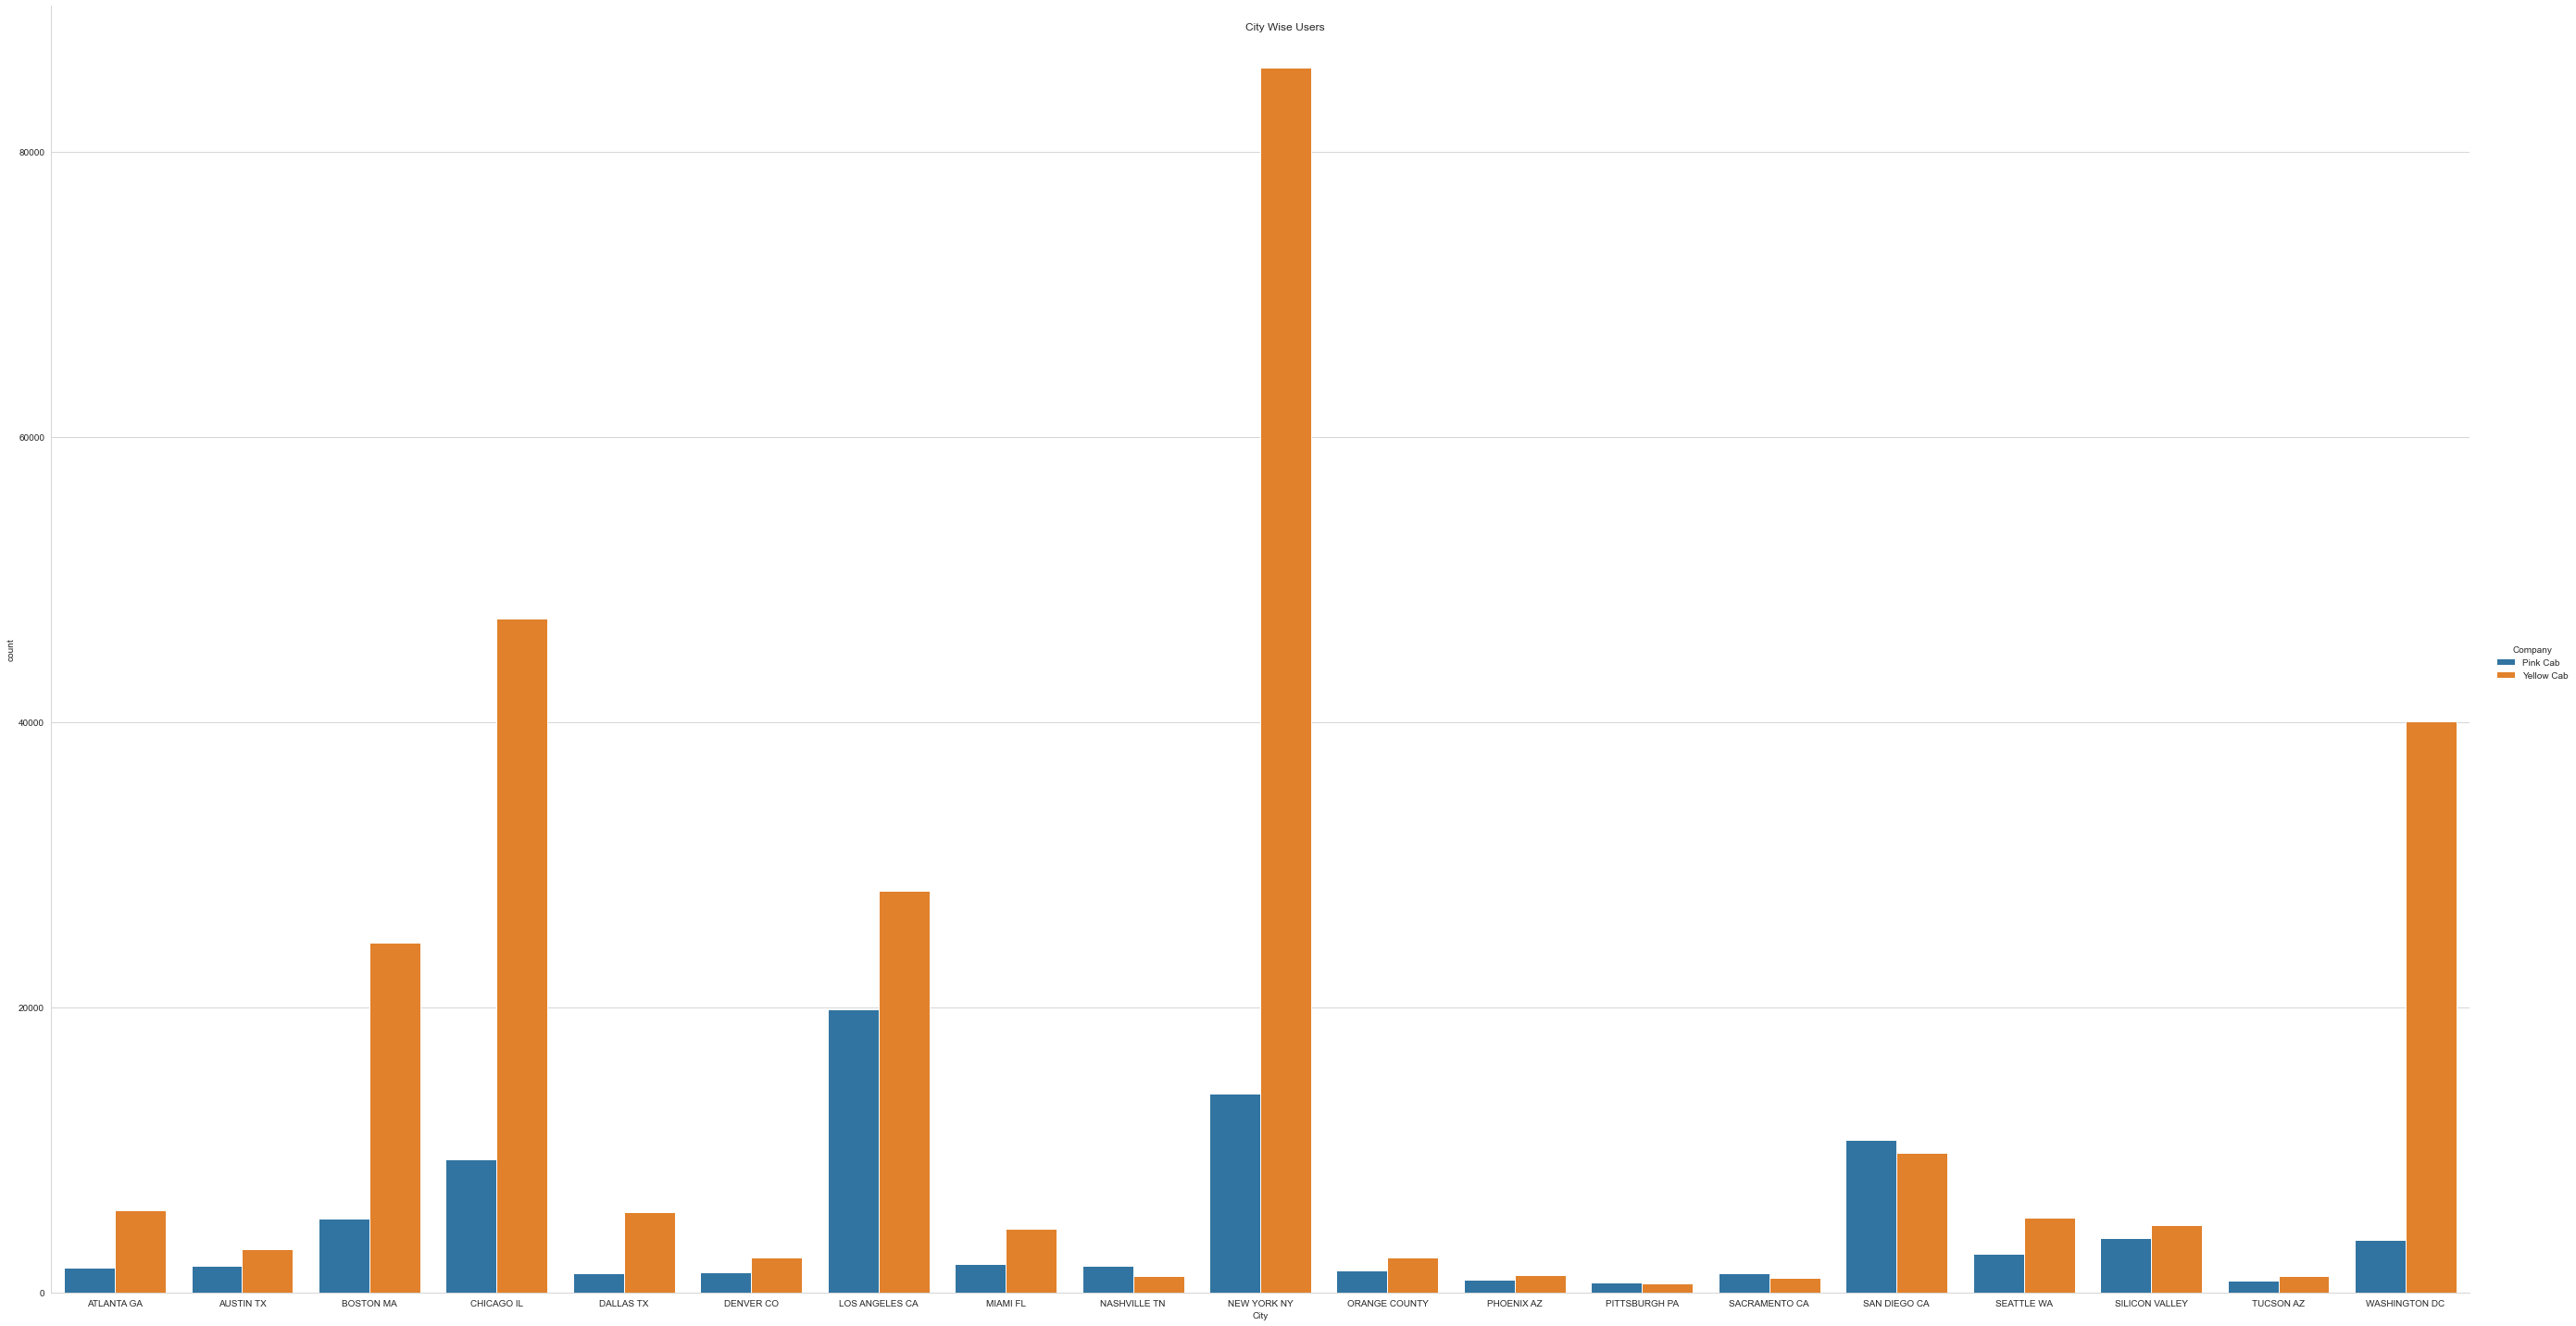

In [25]:
rp=sns.catplot(data=df,x='City',hue='Company',kind='count',height=20, aspect=15/8)
rp.fig.suptitle('City Wise Users')

<p><b>Based on the analysis we would have concluded that investing in the yellow cabs would be a better idea due to the following reasons:</b>
    <ol>
        <li> Analysis of kilo meters travelled we can connclude that yellow cab has travlled much more than pink cabs.</li>
        <li>Analysis of Cost pf Trip and Price Charged we can see that it is much more for yellow cab than pink cab.</li>
        <li>Analysis of gender we observe that both genders prefer yellow cabs over pink cabs.</li>
        <li>Analysing the payment method we observe for both methods people prefer yellow cabs over pink.</li>
        <li>Analysing the age the income of the users we observe, usrs of all age and incomes prefer yellow cabs over    pink cabs.</li>
        <li>Analysing the dates of travel we observe, usage of yellow cabs is much higher than pink cabs.</li>
        <li>When we plot the data for users in each city, we observe except for Nashville and San Deigo users in all other cities yellow cabs over pink cabs, it can be made more clear once we know the percentage of users in each city.</li>
    </ol>
</p>

In [26]:
df_pinkcab['Customer ID'].count()

84711

In [27]:
df_yellowcab['Customer ID'].count()

274681

<p> From the above </p>

In [28]:
lst=[]
for idx, row in City.iterrows():
    a=row.Population.replace(",","")
    b=row.Users.replace(",","")
    per=round((int(b)/int(a))*100,2)
    lst.append(per)

In [29]:
City['Percenatge_Population']=lst

In [30]:
City

City   Population      Users  Percenatge_Population
0        NEW YORK NY   8,405,837    302,149                    3.59
1         CHICAGO IL   1,955,130    164,468                    8.41
2     LOS ANGELES CA   1,595,037    144,132                    9.04
3           MIAMI FL   1,339,155     17,675                    1.32
4     SILICON VALLEY   1,177,609     27,247                    2.31
5      ORANGE COUNTY   1,030,185     12,994                    1.26
6       SAN DIEGO CA     959,307     69,995                    7.30
7         PHOENIX AZ     943,999      6,133                    0.65
8          DALLAS TX     942,908     22,157                    2.35
9         ATLANTA GA     814,885     24,701                    3.03
10         DENVER CO     754,233     12,421                    1.65
11         AUSTIN TX     698,371     14,978                    2.14
12        SEATTLE WA     671,238     25,063                    3.73
13         TUCSON AZ     631,442      5,712                    0.90
14  SAN FRANCISCO CA     629,591    213,609                   33.93
15     SACRAMENTO CA     545,776      7,044                    1.29
16     PITTSBURGH PA     542,085      3,643                    0.67
17     WASHINGTON DC     418,859    127,001                   30.32
18      NASHVILLE TN     327,225      9,270                    2.83
19         BOSTON MA     248,968     80,021                   32.14

In [31]:
print(df['City'].unique())

['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


In [32]:
#Pink Cab Users Based on Cities
g=df_pinkcab.groupby('City')
city_list=[]
lst_pinkusers=[]
for city,city_df in g:
    print(city)
    print(city_df['Customer ID'].count())
    lst_pinkusers.append(city_df['Customer ID'].count())
    city_list.append(city)

ATLANTA GA
1762
AUSTIN TX
1868
BOSTON MA
5186
CHICAGO IL
9361
DALLAS TX
1380
DENVER CO
1394
LOS ANGELES CA
19865
MIAMI FL
2002
NASHVILLE TN
1841
NEW YORK NY
13967
ORANGE COUNTY
1513
PHOENIX AZ
864
PITTSBURGH PA
682
SACRAMENTO CA
1334
SAN DIEGO CA
10672
SEATTLE WA
2732
SILICON VALLEY
3797
TUCSON AZ
799
WASHINGTON DC
3692


In [33]:
#Yellow Cab Users Based on Cities
g=df_yellowcab.groupby('City')
lst_yellowuser=[]
for city,city_df in g:
    print(city)
    print(city_df['Customer ID'].count())
    lst_yellowuser.append(city_df['Customer ID'].count())

ATLANTA GA
5795
AUSTIN TX
3028
BOSTON MA
24506
CHICAGO IL
47264
DALLAS TX
5637
DENVER CO
2431
LOS ANGELES CA
28168
MIAMI FL
4452
NASHVILLE TN
1169
NEW YORK NY
85918
ORANGE COUNTY
2469
PHOENIX AZ
1200
PITTSBURGH PA
631
SACRAMENTO CA
1033
SAN DIEGO CA
9816
SEATTLE WA
5265
SILICON VALLEY
4722
TUCSON AZ
1132
WASHINGTON DC
40045


In [34]:
percentage_users_df=pd.DataFrame()

In [35]:
percentage_users_df['City']=city_list
percentage_users_df['PinkCabUsers']=lst_pinkusers
percentage_users_df['YellowCabUsers']=lst_yellowuser

In [36]:
percentage_users_df

City  PinkCabUsers  YellowCabUsers
0       ATLANTA GA          1762            5795
1        AUSTIN TX          1868            3028
2        BOSTON MA          5186           24506
3       CHICAGO IL          9361           47264
4        DALLAS TX          1380            5637
5        DENVER CO          1394            2431
6   LOS ANGELES CA         19865           28168
7         MIAMI FL          2002            4452
8     NASHVILLE TN          1841            1169
9      NEW YORK NY         13967           85918
10   ORANGE COUNTY          1513            2469
11      PHOENIX AZ           864            1200
12   PITTSBURGH PA           682             631
13   SACRAMENTO CA          1334            1033
14    SAN DIEGO CA         10672            9816
15      SEATTLE WA          2732            5265
16  SILICON VALLEY          3797            4722
17       TUCSON AZ           799            1132
18   WASHINGTON DC          3692           40045

In [37]:
Users_df=City.join(percentage_users_df.set_index('City'), on='City')
Users_df

City   Population      Users  Percenatge_Population  \
0        NEW YORK NY   8,405,837    302,149                    3.59   
1         CHICAGO IL   1,955,130    164,468                    8.41   
2     LOS ANGELES CA   1,595,037    144,132                    9.04   
3           MIAMI FL   1,339,155     17,675                    1.32   
4     SILICON VALLEY   1,177,609     27,247                    2.31   
5      ORANGE COUNTY   1,030,185     12,994                    1.26   
6       SAN DIEGO CA     959,307     69,995                    7.30   
7         PHOENIX AZ     943,999      6,133                    0.65   
8          DALLAS TX     942,908     22,157                    2.35   
9         ATLANTA GA     814,885     24,701                    3.03   
10         DENVER CO     754,233     12,421                    1.65   
11         AUSTIN TX     698,371     14,978                    2.14   
12        SEATTLE WA     671,238     25,063                    3.73   
13         TUCSON AZ     631,442      5,712                    0.90   
14  SAN FRANCISCO CA     629,591    213,609                   33.93   
15     SACRAMENTO CA     545,776      7,044                    1.29   
16     PITTSBURGH PA     542,085      3,643                    0.67   
17     WASHINGTON DC     418,859    127,001                   30.32   
18      NASHVILLE TN     327,225      9,270                    2.83   
19         BOSTON MA     248,968     80,021                   32.14   

    PinkCabUsers  YellowCabUsers  
0        13967.0         85918.0  
1         9361.0         47264.0  
2        19865.0         28168.0  
3         2002.0          4452.0  
4         3797.0          4722.0  
5         1513.0          2469.0  
6        10672.0          9816.0  
7          864.0          1200.0  
8         1380.0          5637.0  
9         1762.0          5795.0  
10        1394.0          2431.0  
11        1868.0          3028.0  
12        2732.0          5265.0  
13         799.0          1132.0  
14           NaN             NaN  
15        1334.0          1033.0  
16         682.0           631.0  
17        3692.0         40045.0  
18        1841.0          1169.0  
19        5186.0         24506.0

Based on the table above we can see that the percenatge of users are highest for the following cities: San Francisco, Washington DC, Boston MA. However, from the data it seems there are no yellow or pink cabs in San Francisco. Hence we will find the percentage of pink and yellow cbs each.

In [38]:
lst_pinkcabusers=[]
for idx, row in Users_df.iterrows():
    a=row.Population.replace(",","")
    b=row.PinkCabUsers
    per=round((b/int(a))*100,2)
    lst_pinkcabusers.append(per)

In [39]:
lst_yellowcabusers=[]
for idx, row in Users_df.iterrows():
    a=row.Population.replace(",","")
    b=row.YellowCabUsers
    per=round((b/int(a))*100,2)
    lst_yellowcabusers.append(per)

In [40]:
Users_df['Percentage_pinkcabusers']=lst_pinkcabusers
Users_df['Percentage_yellowcabusers']=lst_yellowcabusers
Users_df

City   Population      Users  Percenatge_Population  \
0        NEW YORK NY   8,405,837    302,149                    3.59   
1         CHICAGO IL   1,955,130    164,468                    8.41   
2     LOS ANGELES CA   1,595,037    144,132                    9.04   
3           MIAMI FL   1,339,155     17,675                    1.32   
4     SILICON VALLEY   1,177,609     27,247                    2.31   
5      ORANGE COUNTY   1,030,185     12,994                    1.26   
6       SAN DIEGO CA     959,307     69,995                    7.30   
7         PHOENIX AZ     943,999      6,133                    0.65   
8          DALLAS TX     942,908     22,157                    2.35   
9         ATLANTA GA     814,885     24,701                    3.03   
10         DENVER CO     754,233     12,421                    1.65   
11         AUSTIN TX     698,371     14,978                    2.14   
12        SEATTLE WA     671,238     25,063                    3.73   
13         TUCSON AZ     631,442      5,712                    0.90   
14  SAN FRANCISCO CA     629,591    213,609                   33.93   
15     SACRAMENTO CA     545,776      7,044                    1.29   
16     PITTSBURGH PA     542,085      3,643                    0.67   
17     WASHINGTON DC     418,859    127,001                   30.32   
18      NASHVILLE TN     327,225      9,270                    2.83   
19         BOSTON MA     248,968     80,021                   32.14   

    PinkCabUsers  YellowCabUsers  Percentage_pinkcabusers  \
0        13967.0         85918.0                     0.17   
1         9361.0         47264.0                     0.48   
2        19865.0         28168.0                     1.25   
3         2002.0          4452.0                     0.15   
4         3797.0          4722.0                     0.32   
5         1513.0          2469.0                     0.15   
6        10672.0          9816.0                     1.11   
7          864.0          1200.0                     0.09   
8         1380.0          5637.0                     0.15   
9         1762.0          5795.0                     0.22   
10        1394.0          2431.0                     0.18   
11        1868.0          3028.0                     0.27   
12        2732.0          5265.0                     0.41   
13         799.0          1132.0                     0.13   
14           NaN             NaN                      NaN   
15        1334.0          1033.0                     0.24   
16         682.0           631.0                     0.13   
17        3692.0         40045.0                     0.88   
18        1841.0          1169.0                     0.56   
19        5186.0         24506.0                     2.08   

    Percentage_yellowcabusers  
0                        1.02  
1                        2.42  
2                        1.77  
3                        0.33  
4                        0.40  
5                        0.24  
6                        1.02  
7                        0.13  
8                        0.60  
9                        0.71  
10                       0.32  
11                       0.43  
12                       0.78  
13                       0.18  
14                        NaN  
15                       0.19  
16                       0.12  
17                       9.56  
18                       0.36  
19                       9.84

In [41]:
Users_df = Users_df.drop(Users_df.index[14])
Users_df=Users_df.reset_index(drop=True)
Users_df

City   Population      Users  Percenatge_Population  \
0      NEW YORK NY   8,405,837    302,149                    3.59   
1       CHICAGO IL   1,955,130    164,468                    8.41   
2   LOS ANGELES CA   1,595,037    144,132                    9.04   
3         MIAMI FL   1,339,155     17,675                    1.32   
4   SILICON VALLEY   1,177,609     27,247                    2.31   
5    ORANGE COUNTY   1,030,185     12,994                    1.26   
6     SAN DIEGO CA     959,307     69,995                    7.30   
7       PHOENIX AZ     943,999      6,133                    0.65   
8        DALLAS TX     942,908     22,157                    2.35   
9       ATLANTA GA     814,885     24,701                    3.03   
10       DENVER CO     754,233     12,421                    1.65   
11       AUSTIN TX     698,371     14,978                    2.14   
12      SEATTLE WA     671,238     25,063                    3.73   
13       TUCSON AZ     631,442      5,712                    0.90   
14   SACRAMENTO CA     545,776      7,044                    1.29   
15   PITTSBURGH PA     542,085      3,643                    0.67   
16   WASHINGTON DC     418,859    127,001                   30.32   
17    NASHVILLE TN     327,225      9,270                    2.83   
18       BOSTON MA     248,968     80,021                   32.14   

    PinkCabUsers  YellowCabUsers  Percentage_pinkcabusers  \
0        13967.0         85918.0                     0.17   
1         9361.0         47264.0                     0.48   
2        19865.0         28168.0                     1.25   
3         2002.0          4452.0                     0.15   
4         3797.0          4722.0                     0.32   
5         1513.0          2469.0                     0.15   
6        10672.0          9816.0                     1.11   
7          864.0          1200.0                     0.09   
8         1380.0          5637.0                     0.15   
9         1762.0          5795.0                     0.22   
10        1394.0          2431.0                     0.18   
11        1868.0          3028.0                     0.27   
12        2732.0          5265.0                     0.41   
13         799.0          1132.0                     0.13   
14        1334.0          1033.0                     0.24   
15         682.0           631.0                     0.13   
16        3692.0         40045.0                     0.88   
17        1841.0          1169.0                     0.56   
18        5186.0         24506.0                     2.08   

    Percentage_yellowcabusers  
0                        1.02  
1                        2.42  
2                        1.77  
3                        0.33  
4                        0.40  
5                        0.24  
6                        1.02  
7                        0.13  
8                        0.60  
9                        0.71  
10                       0.32  
11                       0.43  
12                       0.78  
13                       0.18  
14                       0.19  
15                       0.12  
16                       9.56  
17                       0.36  
18                       9.84

From above we can conclude that even for cities with the highest percenatge of cab users the yellow cabs are much more than pink cabs. hence, yellow cabs are better investment for any company than pink cabs.